In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import pandas_profiling
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

# DESCRIPTIVE CHALLENGE

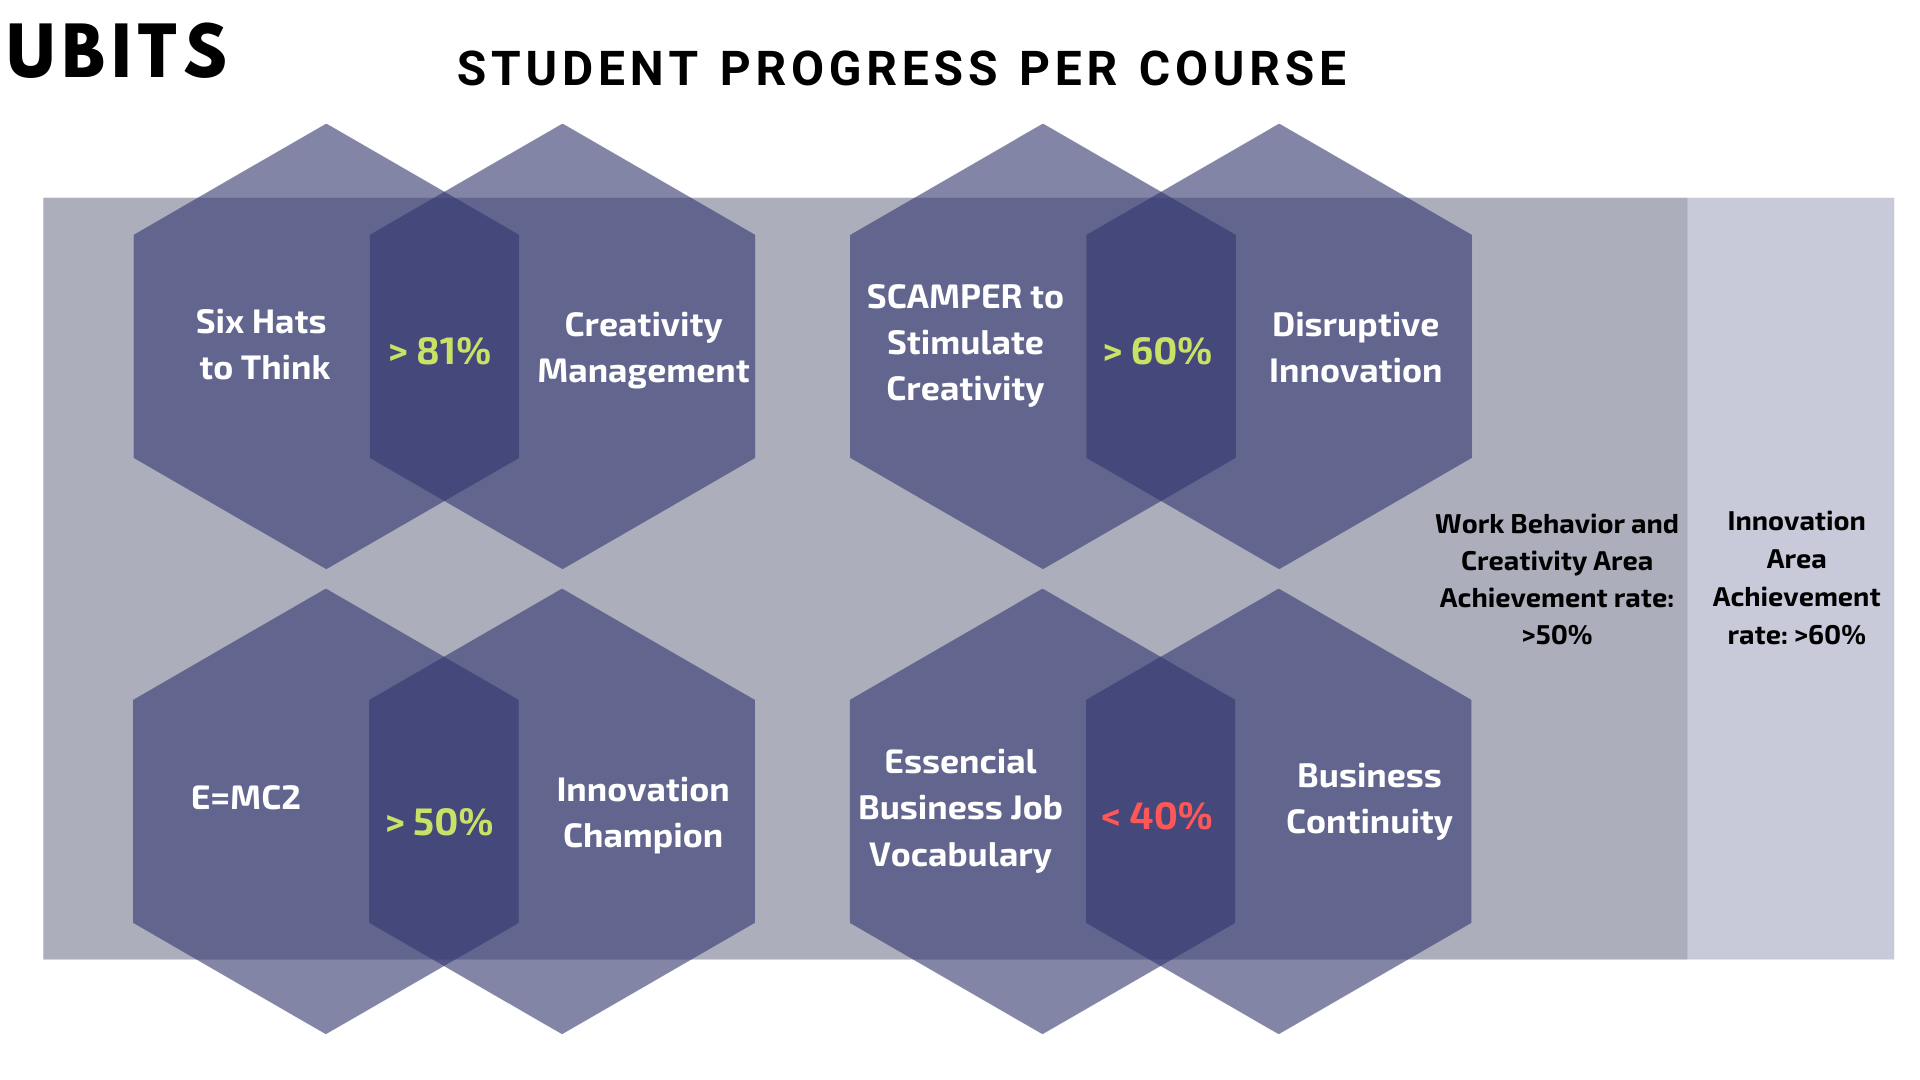

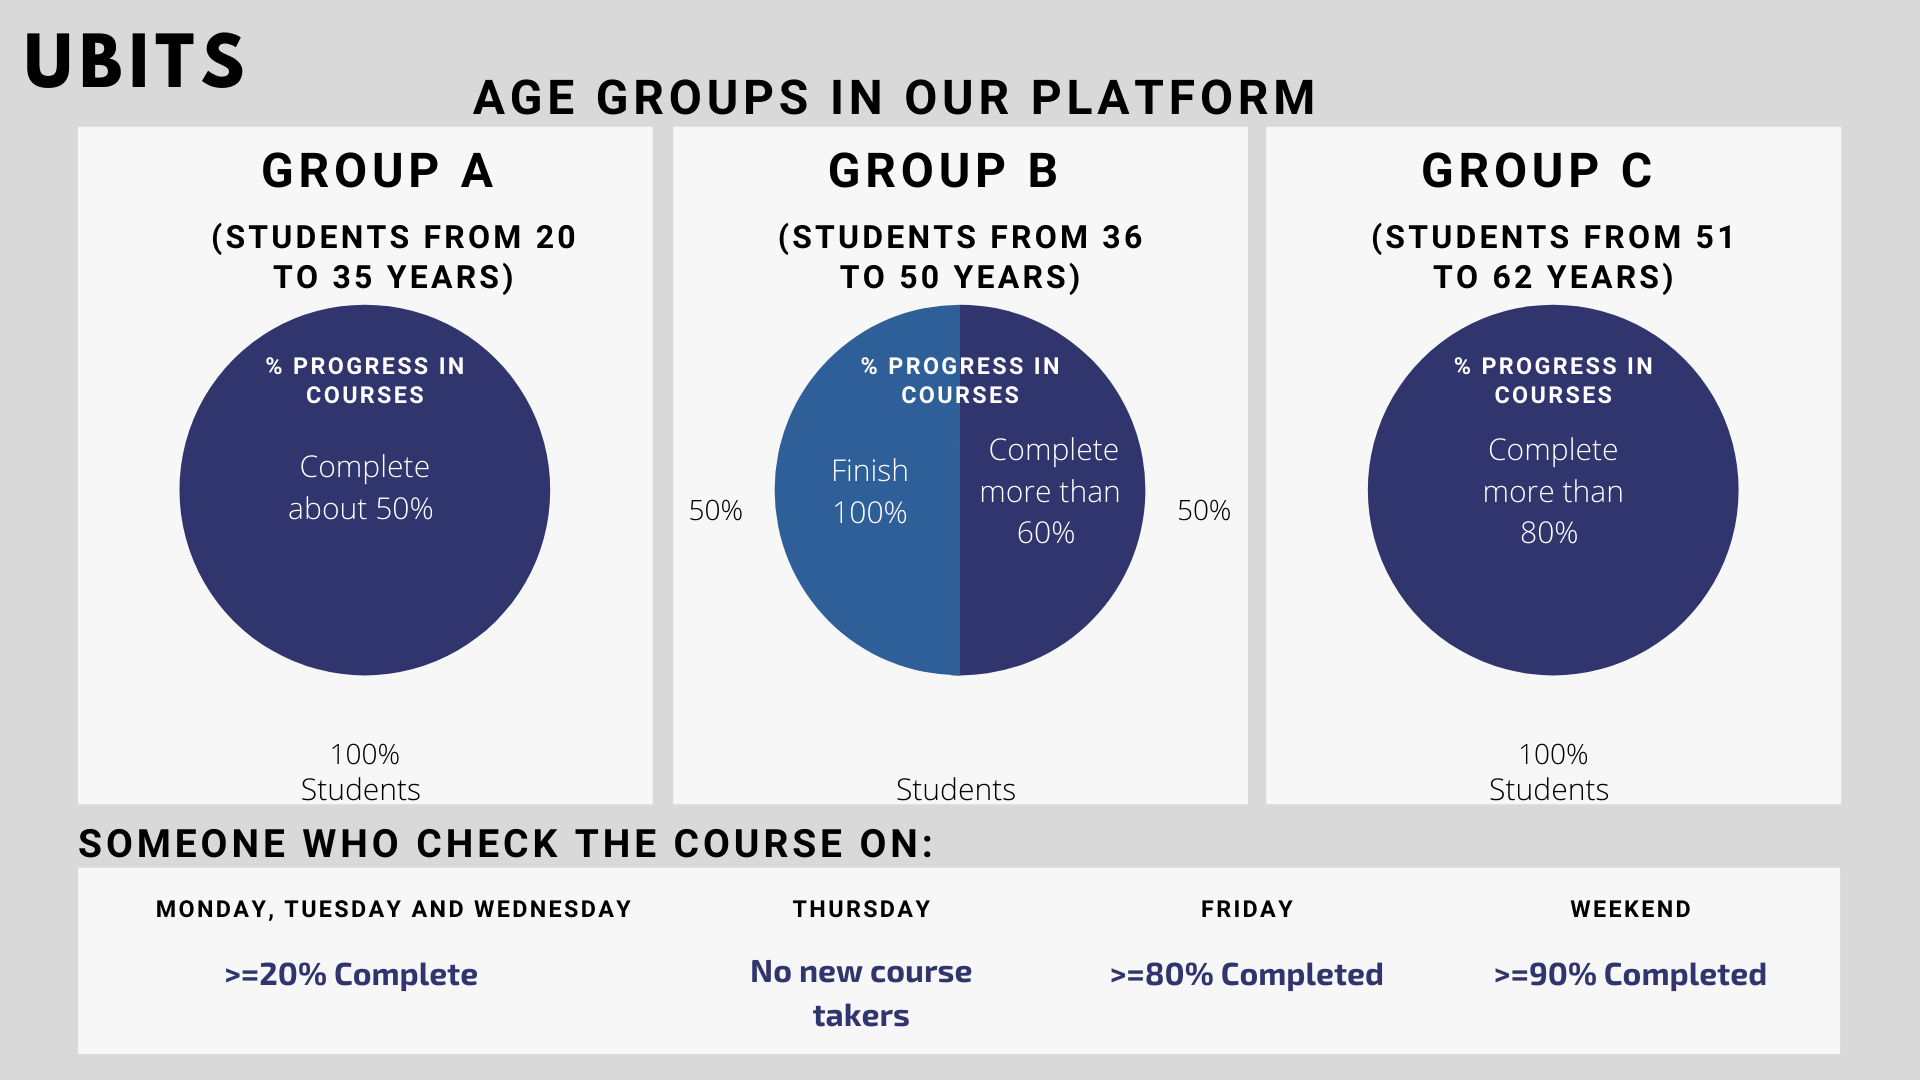

# Open University Learning Analytics dataset

* The dataset contains the information about 22 courses, 32,593 students, their assessment results, and logs of their interactions with the Virtual Learning Environment (VLE) represented by daily summaries of student clicks (10,655,280 entries). 

* At the Open University, courses are called modules. Modules can be presented multiple times during the year. To distinguish between different presentations of a module, each presentation is named by the year and month it starts. For example, presentations starting in January ends with A, in February with B and so on; so that ‘2013J’ means that the presentation started in October 2013.

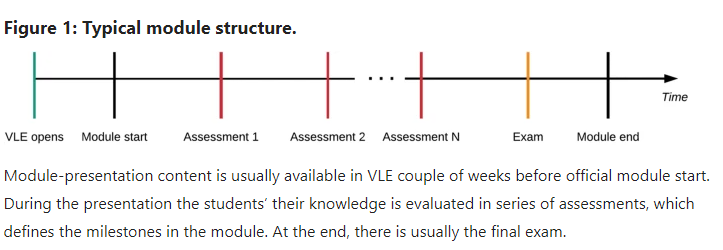

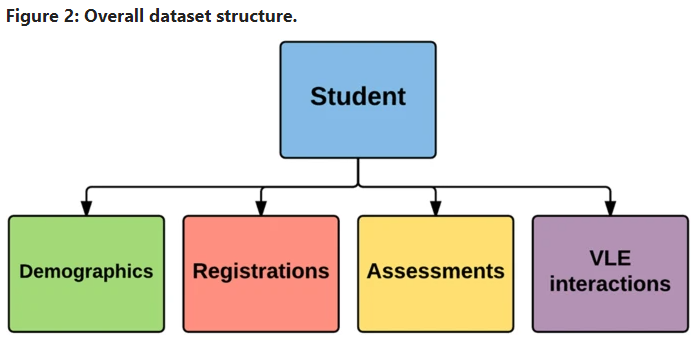

In [2]:
#first of all we read the csv files
studentInfo=pd.read_csv('studentInfo.csv')
courses=pd.read_csv('courses.csv')
studentRegistration=pd.read_csv('studentRegistration.csv')
assessments=pd.read_csv('assessments.csv')
studentAssessment=pd.read_csv('studentAssessment.csv')
studentVle=pd.read_csv('studentVle.csv')
vle=pd.read_csv('vle.csv')

# Description of the data 

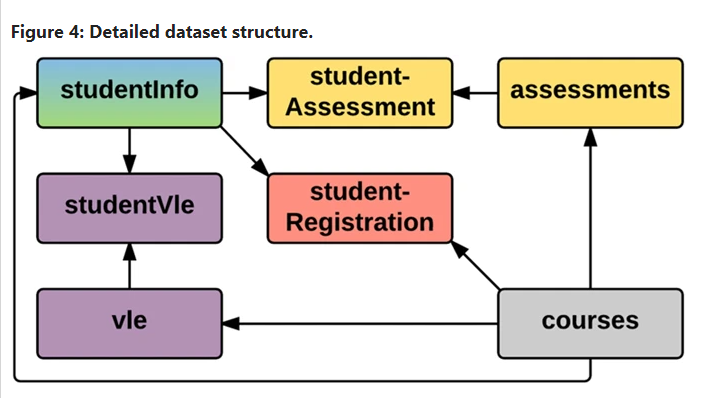

## studentInfo 

This table contains student demographic information and also their results in each module they studied. It consists of 32,593 rows with the following columns

In [3]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


- code_module—module identification code on which the student is registered.
- code_presentation—presentation identification code during which the student is registered on the module.
- id_student—the unique student identification number.
- gender—student’s gender.
- region—the geographic region, where the student lived while taking the module-presentation.
- highest_education—the highest student education level on entry to the module presentation. 
- imd_band—the IMD band of the place where the student lived during the module-presentation.(essentially a measure of poverty)
- age_band—a band of student’s age.
- num_of_prev_attempts—the number of how many times the student has attempted this module.
- studied_credits—the total number of credits for the modules the student is currently studying.
- disability—indicates whether the student has declared a disability.
- final_result—student’s final result in the module-presentation.

In [4]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
#profile = pandas_profiling.ProfileReport(studentInfo)
#profile.to_file('studentInfo.html')

## Courses

The table contains the list of all available modules and their presentations. It consists of 22 rows with the following columns:

In [6]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


* code_module—code name of the module, which serves as the identifier.
* code_presentation—code name of the presentation.
* length—the length of the module-presentation in days from module start date to module end date.

In [7]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [8]:
#profile = pandas_profiling.ProfileReport(courses)
#profile.to_file('courses.html')

## studentRegistration

* Contains information about the time when the student registered for the module presentation. For students who unregistered, the date of un-registration is also recorded. It consists of 32,593 rows with the following columns:

In [9]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


- code_module—the module identification code.

- code_presentation—the presentation identification code.

- id_student—the unique student identification number.

- date_registration—the day of student’s registration for the module presentation.

- date_unregistration—the day of student unregistration from the module presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result in the studentInfo table.

In [10]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [11]:
#profile = pandas_profiling.ProfileReport(studentRegistration)
#profile.to_file('studentRegistration.html')

## assessments

This table contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam. The table consists of 206 rows with the following columns:

In [12]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


- code_module—module identification code, to which the assessment belongs.
- code_presentation—presentation identification code, to which the assessment belongs.
- id_assessment—assessment identification number.
- assessment_type—a type of assessment. Three types of assessments exist—Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
- date—information about the cut-off day of the assessment.
- weight—the weight of the assessment. Typically, Exams are treated separately and have the weight equal to 100%; the sum of all other assessments is also 100%.

If the information about the final exam cut-off day is missing, it takes place during the last week of the module-presentation.

In [13]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [14]:
#profile = pandas_profiling.ProfileReport(assessments)
#profile.to_file('assessments.html')

## studentAssessment

The table contains the results of students’ assessments. If the student does not submit the assessment, no result is recorded. Results of the final exam are usually missing (since they are scored and used for the final marking immediately at the end of the module). It consists of 173,912 rows with the following columns:

In [15]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


- id_assessment—the assessment identification number.
- id_student—the unique student identification number.
- date_submitted—the day of assessment submission.
- is_banked—the status flag indicating that the assessment result has been transferred from a previous presentation.
- score—the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

In [16]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [17]:
#profile = pandas_profiling.ProfileReport(studentAssessment)
#profile.to_file('studentAssessment.html')

## studentVle

The studentVle table contains information about student’s interactions with the VLE. It consists of 10,655,280 rows with the following columns:

In [18]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


- code_module—the module identification code.
- code_presentation—the presentation identification code.
- id_student—the unique student identification number.
- id_site—the VLE material identification number.
- date—the day of student’s interaction with the material.
- sum_click—the number of times the student interacted with the material.

In [19]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [20]:
#profile = pandas_profiling.ProfileReport(studentVle)
#profile.to_file('studentVle.html')

## vle

The vle table contains information about the materials available in the VLE. Typically these are HTML pages, pdf files, etc. It consists of 6,364 rows with the following columns:

In [21]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


- id_site—the identification number of the material.
- code_module—the identification code for the module.
- code_presentation—the identification code of the presentation.
- activity_type—the role associated with the module material.
- week_from—the week from which the material is planned to be used.
- week_to—the week until which the material is planned to be used.

In [22]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [23]:
#profile = pandas_profiling.ProfileReport(vle)
#profile.to_file('vle.html')

# Data Preparation

Our main table will be studentInfo

In [24]:
#Let's create the main key column
studentInfo['key']=studentInfo['code_module']+studentInfo['code_presentation']+studentInfo['id_student'].astype(str)
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,key
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA2013J11391
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA2013J28400
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA2013J30268
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA2013J31604
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA2013J32885


In [25]:
#There are not duplicates in this table
studentInfo[studentInfo.duplicated(['key'])]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,key


In [26]:
#Columns with missing values
[col for col in studentInfo.columns if studentInfo[col].isnull().any()]

['imd_band']

In [27]:
#Number of missing values and the percentage of total rows
print("Missing values: "+ str(len(studentInfo[studentInfo['imd_band'].isna()]))+"  "+"Percentage of total: "+ str(round((len(studentInfo[studentInfo['imd_band'].isna()])/len(studentInfo)),2)*100)+"%")

Missing values: 1111  Percentage of total: 3.0%



-------------------------------------------------------------------------------------------------------------------------


Now we're going to deal with the missing values of imd_band column (This is the only column that has missing values in this table)
* Let's use KNNImputer:
but first of all, we've to remember that KNN Imputer does not recognize categorical variables.
So we must modify the data with one-hot encoding or create “dummy variables”

----------------------------------------------------------------------------------------------------------------------------

In [28]:
categorical_variables = studentInfo[['gender', 'region','highest_education','imd_band','age_band','disability','final_result']]
#The variable that we will fill is an ordinal variable (imd_band), we will replace those values
categorical_variables = categorical_variables.replace({"imd_band" : {'0-10%':1,'10-20':2,'20-30%':3,'30-40%':4,'40-50%':5,
                                                                  '50-60%':6,'60-70%':7,'70-80%':8,'80-90%':9,'90-100%':10      
                                                                }})
categorical_variables = categorical_variables.replace({"age_band" : {'0-35':1,'35-55':2,'55<=':3}})
categorical_variables = categorical_variables.replace({"gender":{'F':1,"M":0}})
categorical_variables = categorical_variables.replace({"disability":{'Y':1,"N":0}})
categorical_variables = categorical_variables.replace({"highest_education":{'No Formal quals':1,"Lower Than A Level":2,
                                                                            'A Level or Equivalent':3,'HE Qualification':4,
                                                                            'Post Graduate Qualification':5
                                                                           }})

In [29]:
#Because of the purpose of this study is to determine whether students can pass a course or not
#We are going to modify the target variable (final_result)
print(categorical_variables['final_result'].value_counts())
#Pass and Distinction will be "Pass" and it will be encode as 1
#Fail and Withdrawn will be "Fail" and it will be encode as 0
categorical_variables = categorical_variables.replace({"final_result" : {'Pass':1,'Distinction':1,'Withdrawn':0,'Fail':0}})

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


In [30]:
#Now let's create dummies for the rest of the variables
categorical_dummies = pd.get_dummies(categorical_variables[['region']])
categorical_dummies.head()

,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
categorical_variables = pd.concat([categorical_variables[['imd_band','age_band','final_result','gender','disability','highest_education']], categorical_dummies], axis=1)
studentInfo=pd.concat([studentInfo[['code_module','code_presentation','id_student','key','num_of_prev_attempts','studied_credits']],
          categorical_variables],axis=1)

In [32]:
pd.set_option('display.max_columns', None)
studentInfo.head()

,code_module,code_presentation,id_student,key,num_of_prev_attempts,studied_credits,imd_band,age_band,final_result,gender,disability,highest_education,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,AAA,2013J,11391,AAA2013J11391,0,240,10.0,3,1,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0
1,AAA,2013J,28400,AAA2013J28400,0,60,3.0,2,1,1,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0
2,AAA,2013J,30268,AAA2013J30268,0,60,4.0,2,0,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0
3,AAA,2013J,31604,AAA2013J31604,0,60,6.0,2,1,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,AAA,2013J,32885,AAA2013J32885,0,60,6.0,1,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
#We will use Scikit-Learn’s MinMaxScaler which will scale our variables to have values between 0 and 1.
#We've to do this because of KNN Imputer is a distance-based imputation method and it requires us to normalize our data.
scaler = MinMaxScaler()
studentInfo_KNN = pd.DataFrame(scaler.fit_transform(studentInfo.drop(columns=['code_module','code_presentation','id_student','key'])), 
                  columns =studentInfo.drop(columns=['code_module','code_presentation','id_student','key']).columns )
studentInfo_KNN.head()

,num_of_prev_attempts,studied_credits,imd_band,age_band,final_result,gender,disability,highest_education,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,0.0,0.336,1.000000,1.0,1.0,0.0,0.0,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.048,0.222222,0.5,1.0,1.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.048,0.333333,0.5,0.0,1.0,1.0,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.048,0.555556,0.5,1.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.048,0.555556,0.0,1.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
#Now we're going to impute the missing values for the imd_band variable
imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(studentInfo_KNN),columns = studentInfo_KNN.columns)

In [35]:
#Now the missing values were filled
pd.DataFrame(scaler.inverse_transform(imputed_data)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       32593 non-null  float64
 1   1       32593 non-null  float64
 2   2       32593 non-null  float64
 3   3       32593 non-null  float64
 4   4       32593 non-null  float64
 5   5       32593 non-null  float64
 6   6       32593 non-null  float64
 7   7       32593 non-null  float64
 8   8       32593 non-null  float64
 9   9       32593 non-null  float64
 10  10      32593 non-null  float64
 11  11      32593 non-null  float64
 12  12      32593 non-null  float64
 13  13      32593 non-null  float64
 14  14      32593 non-null  float64
 15  15      32593 non-null  float64
 16  16      32593 non-null  float64
 17  17      32593 non-null  float64
 18  18      32593 non-null  float64
 19  19      32593 non-null  float64
 20  20      32593 non-null  float64
dtypes: float64(21)
memory usage: 5.2 MB

In [36]:
#We've to round these values
pd.DataFrame(scaler.inverse_transform(imputed_data))[2].unique()

array([10. ,  3. ,  4. ,  6. ,  9. ,  8. ,  6.4,  7. ,  5. ,  2.4,  2. ,
        1. ,  5.4,  6.2,  3.8,  5.8,  5.8,  4.8,  3.2,  4.6,  4.8,  7.6,
        4.4,  7.4,  4.4,  2.2,  5.4,  4.2,  3.4,  6.8,  5.6,  3.2,  3. ,
        3.6,  2.8,  6.6,  5.2,  2.6,  5. ,  3.8,  4. ,  3.8,  7.8,  3.4,
        3.6,  3.4,  8.4,  1.8,  8.6,  7.8,  2.4,  9.2,  1.6,  8.2,  6. ,
        1.8,  7.6,  3. ,  8.2,  7. ])

In [37]:
#Now we fill those values into our main table
studentInfo['imd_band']=pd.DataFrame(scaler.inverse_transform(imputed_data))[2].apply(lambda x:round(x))

In [38]:
#Now studentInfo table is prepared
studentInfo

,code_module,code_presentation,id_student,key,num_of_prev_attempts,studied_credits,imd_band,age_band,final_result,gender,disability,highest_education,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region
0,AAA,2013J,11391,AAA2013J11391,0,240,10,3,1,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0
1,AAA,2013J,28400,AAA2013J28400,0,60,3,2,1,1,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0
2,AAA,2013J,30268,AAA2013J30268,0,60,4,2,0,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0
3,AAA,2013J,31604,AAA2013J31604,0,60,6,2,1,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,AAA,2013J,32885,AAA2013J32885,0,60,6,1,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,GGG2014J2640965,0,30,2,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0
32589,GGG,2014J,2645731,GGG2014J2645731,0,30,5,2,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0
32590,GGG,2014J,2648187,GGG2014J2648187,0,30,3,1,1,1,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0
32591,GGG,2014J,2679821,GGG2014J2679821,0,30,10,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
#The courses table is clean, so let's merge it
studentInfo=studentInfo.merge(courses,how='left',left_on=['code_module','code_presentation'], right_on=['code_module','code_presentation'])

In [40]:
#Let's extract information from assessments table
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [41]:
#Let's divide the assessment_type column
dummies_assessments=pd.get_dummies(assessments['assessment_type'])
assessments2=pd.concat([assessments[['code_module','code_presentation']], dummies_assessments], axis=1)

In [42]:
#With this code we can extract the amount of assessments of a course
assessments2=assessments2.groupby(['code_module','code_presentation']).sum().reset_index()
assessments2['total_assessments']=assessments2['CMA']+assessments2['Exam']+assessments2['TMA']
assessments2

,code_module,code_presentation,CMA,Exam,TMA,total_assessments
0,AAA,2013J,0,1,5,6
1,AAA,2014J,0,1,5,6
2,BBB,2013B,5,1,6,12
3,BBB,2013J,5,1,6,12
4,BBB,2014B,5,1,6,12
5,BBB,2014J,0,1,5,6
6,CCC,2014B,4,2,4,10
7,CCC,2014J,4,2,4,10
8,DDD,2013B,7,1,6,14
9,DDD,2013J,0,1,6,7


In [43]:
#Now we're going to merge the assessments table with out main table
studentInfo=studentInfo.merge(assessments2,how='left',left_on=['code_module','code_presentation'], right_on=['code_module','code_presentation'])

In [44]:
#In the studentVle table we can extract the mean click per student (sum of clicks/amount of materials)
studentVle_average_click_material=studentVle[['id_student','sum_click']].groupby('id_student').mean().reset_index().rename(columns={'sum_click':'mean_click'})
studentVle_average_click_material

,id_student,mean_click
0,6516,4.216012
1,8462,2.157895
2,11391,4.765306
3,23629,2.728814
4,23698,2.983607
...,...,...
26069,2698251,2.856333
26070,2698257,2.838951
26071,2698535,4.717464
26072,2698577,3.025316


In [45]:
#Let's merge the above table
studentInfo=studentInfo.merge(studentVle_average_click_material,how='left',left_on=['id_student'], right_on=['id_student'])

In [46]:
#We fill the missing data for mean_click with zeros, it means that student didn't click yet in the materials
studentInfo['mean_click']=studentInfo['mean_click'].fillna(0)

In [47]:
#IN THIS CODE I WAS TRYING TO EXTRACT THE HISTORICAL AVERAGE GRADES BEFORE PRESENTING THE CURRENT COURSE
#BUT IT DOESN'T HAVE ENOUGH INFORMATION

#studentAssessment=studentAssessment.merge(assessments[['id_assessment','code_presentation','code_module','weight']],how="left",left_on=['id_assessment'], right_on=['id_assessment'])
#studentAssessment['key']=studentAssessment['code_module']+studentAssessment['code_presentation']+studentAssessment['id_student'].astype(str)

#This code create a new column called date with the code_presentation data 
#studentInfo['date']=studentInfo['code_presentation'].apply(lambda x: x[4]).replace({'B':'02','J':'10'})+"/"+studentInfo['code_presentation'].apply(lambda x: x[:4])
#studentInfo['date']=pd.to_datetime(studentInfo['date'], infer_datetime_format=True)  

#studentAssessment['date']=studentAssessment['code_presentation'].apply(lambda x: x[4]).replace({'B':'02','J':'10'})+"/"+studentAssessment['code_presentation'].apply(lambda x: x[:4])
#studentAssessment['date']=pd.to_datetime(studentAssessment['date'], infer_datetime_format=True)  

#Historical student notes before to presenting current course
#Promedio=[]
#for i,key in enumerate(studentInfo['key']):
#    Promedio.append(studentAssessment[(studentAssessment['key']!=key)&(studentAssessment['id_student']==studentInfo['id_student'][i])&(studentAssessment['date']<studentInfo['date'][i])]['score'].mean())
#studentInfo['AverageGradesBeforeCourse']=pd.Series(Promedio)        

In [48]:
#TENER EN CUENTA NUMERO DE PERIODOS QUE LLEVA ESTUDIANDO, LOS CURSOS QUE HA PASADO ANTERIORMENTE... ETC

-------------
I decided not to use the following tables:
 * studentRegistration: This table doesn't give much information to the model.
 * studentAssessment: It doesn't have enough data to extract the historical average grades
 * vle: This table has a lot of categorical variables that could be not relevant
 
 -----------

# Data Cleaned

In [49]:
studentInfo

,code_module,code_presentation,id_student,key,num_of_prev_attempts,studied_credits,imd_band,age_band,final_result,gender,disability,highest_education,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,module_presentation_length,CMA,Exam,TMA,total_assessments,mean_click
0,AAA,2013J,11391,AAA2013J11391,0,240,10,3,1,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,268,0,1,5,6,4.765306
1,AAA,2013J,28400,AAA2013J28400,0,60,3,2,1,1,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,268,0,1,5,6,3.337209
2,AAA,2013J,30268,AAA2013J30268,0,60,4,2,0,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,268,0,1,5,6,3.697368
3,AAA,2013J,31604,AAA2013J31604,0,60,6,2,1,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,268,0,1,5,6,3.254902
4,AAA,2013J,32885,AAA2013J32885,0,60,6,1,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,268,0,1,5,6,2.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,GGG2014J2640965,0,30,2,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,269,6,1,3,10,2.157895
32589,GGG,2014J,2645731,GGG2014J2645731,0,30,5,2,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,269,6,1,3,10,3.767932
32590,GGG,2014J,2648187,GGG2014J2648187,0,30,3,1,1,1,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,269,6,1,3,10,2.888889
32591,GGG,2014J,2679821,GGG2014J2679821,0,30,10,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,269,6,1,3,10,4.508197


<AxesSubplot:>

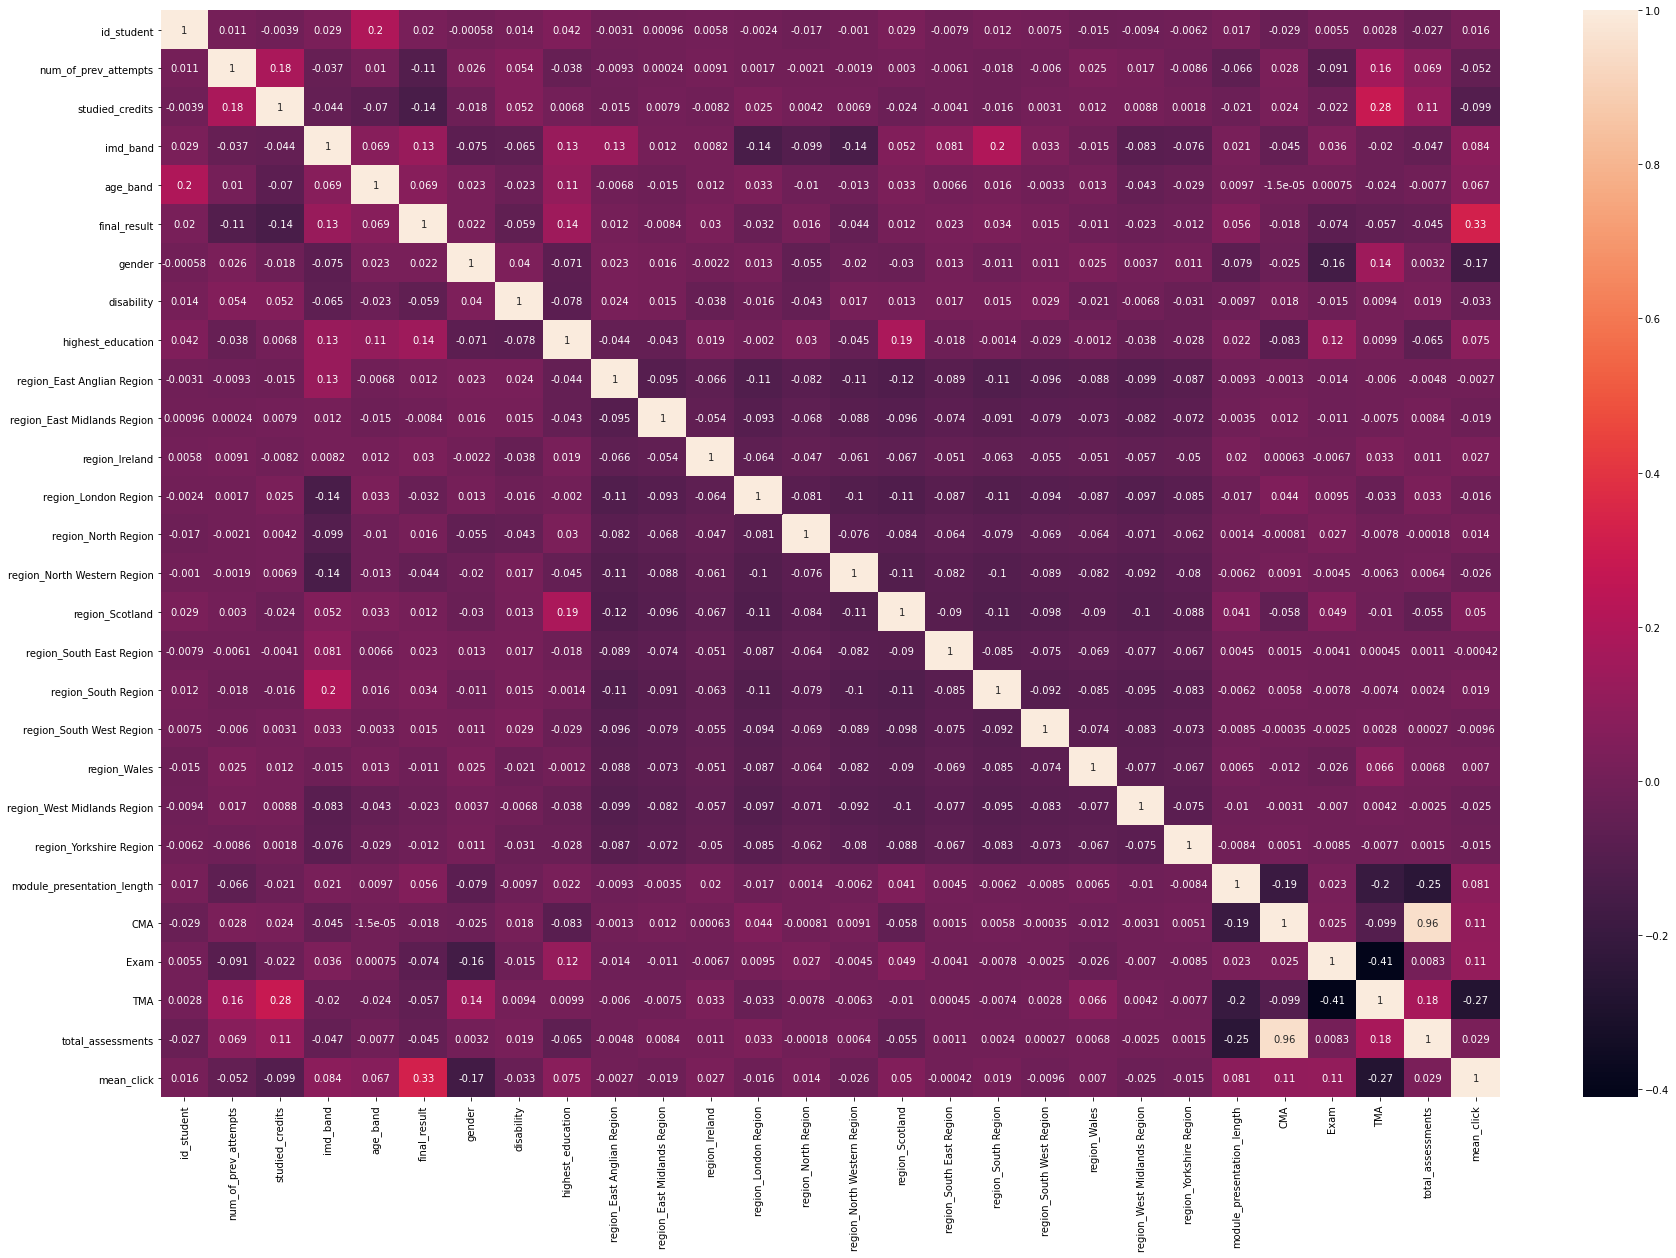

In [50]:
fig, ax = plt.subplots(figsize=(30,20))  
sns.heatmap(studentInfo.corr(),annot=True,ax=ax)

<AxesSubplot:>

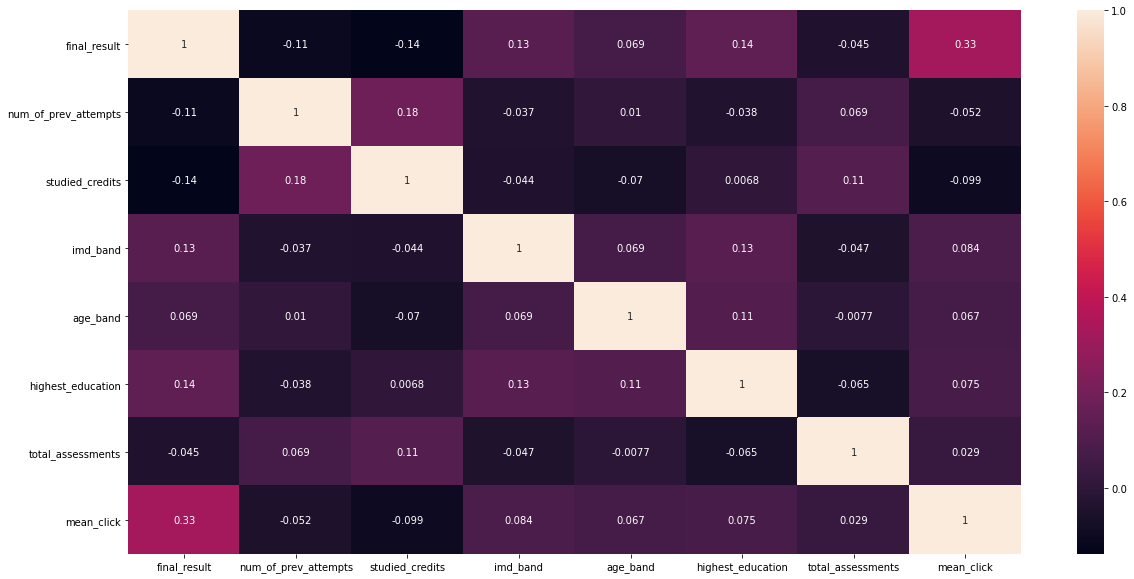

In [51]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(studentInfo[['final_result','num_of_prev_attempts','studied_credits',
                             'imd_band','age_band','highest_education','total_assessments',
                             'mean_click']].corr(),annot=True,ax=ax)

In [52]:
studentInfo.columns

Index(['code_module', 'code_presentation', 'id_student', 'key',
       'num_of_prev_attempts', 'studied_credits', 'imd_band', 'age_band',
       'final_result', 'gender', 'disability', 'highest_education',
       'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'module_presentation_length', 'CMA', 'Exam', 'TMA', 'total_assessments',
       'mean_click'],
      dtype='object')

# Classification

In [53]:
#MODEL 1

In [54]:
Data_To_Predict=studentInfo[['final_result','num_of_prev_attempts','studied_credits',
                             'imd_band','age_band','highest_education','total_assessments',
                             'mean_click']]

In [55]:
#Let's use MinMaxScaler
scaler = MinMaxScaler()
Data_To_Predict = pd.DataFrame(scaler.fit_transform(Data_To_Predict), 
                  columns =Data_To_Predict.columns )
Data_To_Predict.head()

,final_result,num_of_prev_attempts,studied_credits,imd_band,age_band,highest_education,total_assessments,mean_click
0,1.0,0.0,0.336,1.000000,1.0,0.75,0.111111,0.245286
1,1.0,0.0,0.048,0.222222,0.5,0.75,0.111111,0.171777
2,0.0,0.0,0.048,0.333333,0.5,0.50,0.111111,0.190316
3,1.0,0.0,0.048,0.555556,0.5,0.50,0.111111,0.167541
4,1.0,0.0,0.048,0.555556,0.0,0.25,0.111111,0.151203


In [56]:
#The target variable is not balanced
Data_To_Predict['final_result'].value_counts()

0.0    17208
1.0    15385
Name: final_result, dtype: int64

In [57]:
#Let's balance it 

from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42,categorical_features=[2,3,4], k_neighbors=1) #[2,3,4] son las variables categóricas
X = Data_To_Predict.drop('final_result', axis = 1)
Y = Data_To_Predict['final_result']
X_bal, Y_bal = sm.fit_resample(X, Y)


In [58]:
#Now our target variable is balanced
Y_bal.value_counts()

0.0    17208
1.0    17208
Name: final_result, dtype: int64

In [59]:
#Train-Test Split 60-40
from sklearn.model_selection import train_test_split

X = X_bal
Y = Y_bal
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, stratify=Y)
Y_train.value_counts()

0.0    10325
1.0    10324
Name: final_result, dtype: int64

In [60]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,min_samples_leaf=2, max_depth=12)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, Y_train) 

RandomForestClassifier(max_depth=12, min_samples_leaf=2)

In [61]:
#Evaluating the model
Y_pred = clf.predict(X_test)

acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {acc}')

p=metrics.precision_score(Y_test, Y_pred, labels=[1,0],  average=None)
print(f'Presicion: {p}')

r=metrics.recall_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'Recall(recall): {r}')

f1=metrics.f1_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'F1: {f1}')


Accuracy: 0.7038570494661146
Presicion: [0.6723143  0.74955532]
Recall(recall): [0.79546775 0.61223304]
F1: [0.72872447 0.67397041]


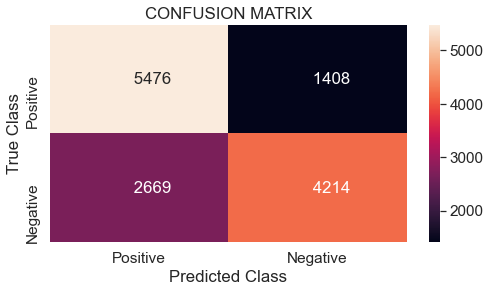

In [62]:
#Confusion Matrix
matconf=metrics.confusion_matrix(Y_test, Y_pred, labels=[1,0])
array = matconf
values=["Positive","Negative"]
df_cm = pd.DataFrame(array, values, values)
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, fmt="10").set(xlabel='Predicted Class', ylabel='True Class', title='CONFUSION MATRIX') # font size
plt.show()

ROC Curve (TPR vs FPR): 0.7038503946134456


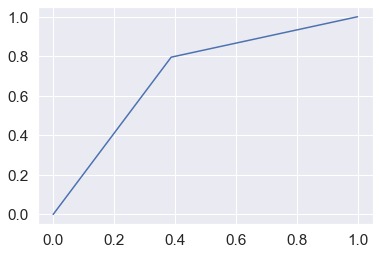

In [63]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1)
plt.plot(fpr, tpr)

auc=metrics.auc(fpr, tpr)
print(f'ROC Curve (TPR vs FPR): {auc}')

### Option 2 - Adding Region Variable

In [64]:
Data_To_Predict=studentInfo.drop(columns={'code_module', 'code_presentation', 'id_student','key','gender', 'disability',
                                          'total_assessments'})

In [65]:
Data_To_Predict

,num_of_prev_attempts,studied_credits,imd_band,age_band,final_result,highest_education,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,module_presentation_length,CMA,Exam,TMA,mean_click
0,0,240,10,3,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,268,0,1,5,4.765306
1,0,60,3,2,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,268,0,1,5,3.337209
2,0,60,4,2,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,268,0,1,5,3.697368
3,0,60,6,2,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,268,0,1,5,3.254902
4,0,60,6,1,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,268,0,1,5,2.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,0,30,2,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,269,6,1,3,2.157895
32589,0,30,5,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,269,6,1,3,3.767932
32590,0,30,3,1,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,269,6,1,3,2.888889
32591,0,30,10,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,269,6,1,3,4.508197


In [66]:
#Let's use MinMaxScaler
scaler = MinMaxScaler()
Data_To_Predict = pd.DataFrame(scaler.fit_transform(Data_To_Predict), 
                  columns =Data_To_Predict.columns )
Data_To_Predict.head()

,num_of_prev_attempts,studied_credits,imd_band,age_band,final_result,highest_education,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,module_presentation_length,CMA,Exam,TMA,mean_click
0,0.0,0.336,1.000000,1.0,1.0,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971429,0.0,0.0,0.666667,0.245286
1,0.0,0.048,0.222222,0.5,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971429,0.0,0.0,0.666667,0.171777
2,0.0,0.048,0.333333,0.5,0.0,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971429,0.0,0.0,0.666667,0.190316
3,0.0,0.048,0.555556,0.5,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.971429,0.0,0.0,0.666667,0.167541
4,0.0,0.048,0.555556,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.971429,0.0,0.0,0.666667,0.151203


In [67]:
#The target variable is not balanced
Data_To_Predict['final_result'].value_counts()

0.0    17208
1.0    15385
Name: final_result, dtype: int64

In [68]:
#Let's balance it 
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(categorical_features=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], k_neighbors=1) #[0,3,4,5] son las variables categóricas
X = Data_To_Predict.drop('final_result', axis = 1)
Y = Data_To_Predict['final_result']
X_bal, Y_bal = sm.fit_resample(X, Y)


In [69]:
#Now our target variable is balanced
Y_bal.value_counts()

0.0    17208
1.0    17208
Name: final_result, dtype: int64

In [70]:
#Train-Test Split 60-40
from sklearn.model_selection import train_test_split

X = X_bal
Y = Y_bal
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, stratify=Y)
Y_train.value_counts()

0.0    10325
1.0    10324
Name: final_result, dtype: int64

In [71]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200,min_samples_leaf=4, max_depth=13)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, Y_train) 

RandomForestClassifier(max_depth=13, min_samples_leaf=4, n_estimators=200)

Exactitud: 0.714970581826106
Matriz de Confusión (filas:real, col:prediccion): 
 [[5505 1379]
 [2545 4338]]
Presición: [0.68385093 0.75878957]
Cobertura(recall): [0.79968042 0.63024844]
F1: [0.73724387 0.68857143]
Area bajo la curva ROC: 0.7149644282712218


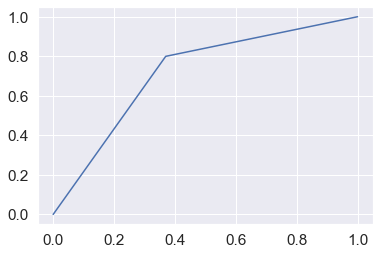

In [72]:
#Evaluating the model
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud: {acc}')

matconf=metrics.confusion_matrix(Y_test, Y_pred, labels=[1,0]) #filas:real, col:prediccion
print(f'Matriz de Confusión (filas:real, col:prediccion): \n {matconf}')

p=metrics.precision_score(Y_test, Y_pred, labels=[1,0],  average=None)
print(f'Presición: {p}')

r=metrics.recall_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'Cobertura(recall): {r}')

f1=metrics.f1_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'F1: {f1}')

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1) #pos_label indica la clase positiva
plt.plot(fpr, tpr)

auc=metrics.auc(fpr, tpr)
print(f'Area bajo la curva ROC: {auc}')

In [68]:
#Decision Tree Classifier
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=4, max_depth=10)
model = model.fit(X_train, Y_train)

Exactitud: 0.6856174334140436
Matriz de Confusión (filas:real, col:prediccion): 
 [[3927 1235]
 [2011 3152]]
Presición: [0.66133378 0.71848644]
Cobertura(recall): [0.76075165 0.61049777]
F1: [0.70756757 0.66010471]
Area bajo la curva ROC: 0.685624709630704


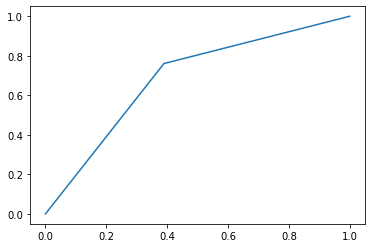

In [69]:
#Evaluating the model
from sklearn import metrics
Y_pred = model.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud: {acc}')

matconf=metrics.confusion_matrix(Y_test, Y_pred, labels=[1,0]) 
print(f'Matriz de Confusión (filas:real, col:prediccion): \n {matconf}')

p=metrics.precision_score(Y_test, Y_pred, labels=[1,0],  average=None)
print(f'Presición: {p}')

r=metrics.recall_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'Cobertura(recall): {r}')

f1=metrics.f1_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'F1: {f1}')

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1) 
plt.plot(fpr, tpr)

auc=metrics.auc(fpr, tpr)
print(f'Area bajo la curva ROC: {auc}')

In [70]:
#Support Vector Machine
from sklearn.svm import SVC 
model = SVC(kernel='rbf') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
model.fit(X_train, Y_train) 
print(f'Vectores de soporte \n {model.support_vectors_}') 
print(f'Indices de los vectores de soporte {model.support_}')  
print(f'Vectores de soporte para cada clase {model.n_support_}')  

Vectores de soporte 
 [[0.16666667 0.048      0.88888889 ... 1.         0.         0.        ]
 [0.         0.048      1.         ... 0.         0.         1.        ]
 [0.         0.144      0.11111111 ... 0.         0.         1.        ]
 ...
 [0.         0.048      0.33333333 ... 0.         0.         1.        ]
 [0.         0.144      0.44444444 ... 0.         0.         0.        ]
 [0.         0.048      1.         ... 0.         0.         0.        ]]
Indices de los vectores de soporte [    0     2     4 ... 24079 24080 24088]
Vectores de soporte para cada clase [9091 9107]


Exactitud: 0.6691525423728814
Matriz de Confusión (filas:real, col:prediccion): 
 [[3901 1261]
 [2155 3008]]
Presición: [0.64415456 0.70461466]
Cobertura(recall): [0.75571484 0.58260701]
F1: [0.69548939 0.63782867]
Area bajo la curva ROC: 0.6691609253185367


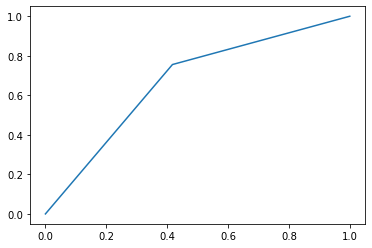

In [71]:
#Evaluating the model
Y_pred = model.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud: {acc}')

matconf=metrics.confusion_matrix(Y_test, Y_pred, labels=[1,0]) #filas:real, col:prediccion
print(f'Matriz de Confusión (filas:real, col:prediccion): \n {matconf}')

p=metrics.precision_score(Y_test, Y_pred, labels=[1,0],  average=None)
print(f'Presición: {p}')

r=metrics.recall_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'Cobertura(recall): {r}')

f1=metrics.f1_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'F1: {f1}')

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1) #pos_label indica la clase positiva
plt.plot(fpr, tpr)

auc=metrics.auc(fpr, tpr)
print(f'Area bajo la curva ROC: {auc}')

In [72]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto')
model.fit(X_train, Y_train) 
print(X.columns.values)
print(model.coef_)
print(model.intercept_)

['num_of_prev_attempts' 'studied_credits' 'imd_band' 'age_band'
 'highest_education' 'total_assessments' 'mean_click' 'region_South'
 'region_North' 'region_East' 'region_West' 'region_Other']
[[-1.84145233 -3.31859764  0.54685514  0.22316797  1.36702723 -0.23192268
   9.56465895 -0.20530471 -0.37242566 -0.32908371 -0.31405807 -0.39628767]]
[-1.61715984]


Exactitud: 0.6621791767554479
Matriz de Confusión (filas:real, col:prediccion): 
 [[3518 1644]
 [1844 3319]]
Presición: [0.65609847 0.66874874]
Cobertura(recall): [0.68151879 0.64284331]
F1: [0.66856708 0.65554019]
Area bajo la curva ROC: 0.6621810496601944


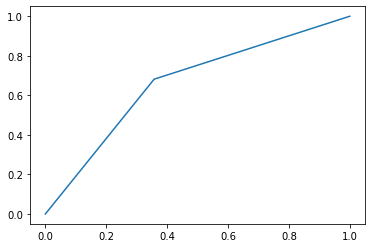

In [73]:
#Evaluating the model
Y_pred = model.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud: {acc}')

matconf=metrics.confusion_matrix(Y_test, Y_pred, labels=[1,0]) #filas:real, col:prediccion
print(f'Matriz de Confusión (filas:real, col:prediccion): \n {matconf}')

p=metrics.precision_score(Y_test, Y_pred, labels=[1,0],  average=None)
print(f'Presición: {p}')

r=metrics.recall_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'Cobertura(recall): {r}')

f1=metrics.f1_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'F1: {f1}')

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1) #pos_label indica la clase positiva
plt.plot(fpr, tpr)

auc=metrics.auc(fpr, tpr)
print(f'Area bajo la curva ROC: {auc}')

In [74]:
#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train) 
print(f'Variables:\n {X.columns.values}')
print(f'Medias de las variables por clase:\n{model.theta_}')  
print(f'Varianzas de las variables por clase:\n{model.sigma_}')  

Variables:
 ['num_of_prev_attempts' 'studied_credits' 'imd_band' 'age_band'
 'highest_education' 'total_assessments' 'mean_click' 'region_South'
 'region_North' 'region_East' 'region_West' 'region_Other']
Medias de las variables por clase:
[[0.03460634 0.08821586 0.42798764 0.13590702 0.40842673 0.56255708
  0.13131718 0.21062682 0.15566625 0.17916148 0.08418431 0.37036115]
 [0.01811888 0.06957565 0.50678879 0.16731695 0.4626432  0.53405298
  0.18118232 0.24970945 0.13581272 0.17640711 0.07413249 0.36393824]]
Varianzas de las variables por clase:
[[0.00815391 0.00508238 0.09476579 0.05205647 0.03347818 0.1011425
  0.00680761 0.16626316 0.13143427 0.14706264 0.07709731 0.23319377]
 [0.00415867 0.0032786  0.09359444 0.05977276 0.03484056 0.11012245
  0.00336583 0.18735464 0.11736762 0.14528764 0.06863687 0.2314872 ]]


Exactitud: 0.6587893462469734
Matriz de Confusión (filas:real, col:prediccion): 
 [[4064 1098]
 [2425 2738]]
Presición: [0.62629065 0.71376434]
Cobertura(recall): [0.78729175 0.53031183]
F1: [0.69762252 0.60851206]
Area bajo la curva ROC: 0.6588017907948271


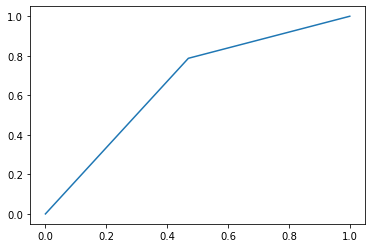

In [75]:
#Evaluating the model
Y_pred = model.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud: {acc}')

matconf=metrics.confusion_matrix(Y_test, Y_pred, labels=[1,0]) #filas:real, col:prediccion
print(f'Matriz de Confusión (filas:real, col:prediccion): \n {matconf}')

p=metrics.precision_score(Y_test, Y_pred, labels=[1,0],  average=None)
print(f'Presición: {p}')

r=metrics.recall_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'Cobertura(recall): {r}')

f1=metrics.f1_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'F1: {f1}')

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1) #pos_label indica la clase positiva
plt.plot(fpr, tpr)

auc=metrics.auc(fpr, tpr)
print(f'Area bajo la curva ROC: {auc}')

In [286]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [455]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='adam')

In [ ]:
clf.fit(X_train, Y_train) 

Exactitud: 0.6838740920096852
Matriz de Confusión (filas:real, col:prediccion): 
 [[3802 1360]
 [1904 3259]]
Presición: [0.66631616 0.70556397]
Cobertura(recall): [0.73653623 0.63122216]
F1: [0.69966875 0.6663259 ]
Area bajo la curva ROC: 0.6838791919645815


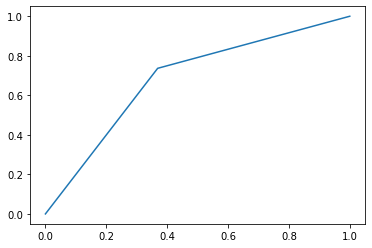

In [457]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud: {acc}')

matconf=metrics.confusion_matrix(Y_test, Y_pred, labels=[1,0]) #filas:real, col:prediccion
print(f'Matriz de Confusión (filas:real, col:prediccion): \n {matconf}')

p=metrics.precision_score(Y_test, Y_pred, labels=[1,0],  average=None)
print(f'Presición: {p}')

r=metrics.recall_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'Cobertura(recall): {r}')

f1=metrics.f1_score(Y_test, Y_pred, labels=[1,0], average=None)
print(f'F1: {f1}')

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1) #pos_label indica la clase positiva
plt.plot(fpr, tpr)

auc=metrics.auc(fpr, tpr)
print(f'Area bajo la curva ROC: {auc}')